In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
DATA_DIR_PATH = '/Users/cindywang/PycharmProjects/bpd-subtyping/data/'
# here we just need to add in all the datasets of interest: pm_df, ds_df, dw_df, dm_df, dp_df, dis_df, pf_df, mf_df
pm_df = pd.read_csv(DATA_DIR_PATH + 'patient_manifest.csv') # selected patients from transformer inclusion criteria
ds_df = pd.read_csv(DATA_DIR_PATH + 'daily_support.csv')
dw_df = pd.read_csv(DATA_DIR_PATH + 'daily_weight.csv')
dis_df = pd.read_csv(DATA_DIR_PATH + 'discharge_bpd_status.csv')

In [4]:
dm_df = pd.read_csv(DATA_DIR_PATH + 'daily_medications.csv')
dp_df = pd.read_csv(DATA_DIR_PATH + 'daily_procedures.csv')
mf_df = pd.read_csv(DATA_DIR_PATH + 'maternal_facts.csv')
pf_df = pd.read_csv(DATA_DIR_PATH + 'patient_facts.csv')

In [5]:
# adjust column name in dw_df

dw_df.columns = ['PatientSeqID', 'DSB', 'PMA', 'Weight']

# remove support max column because it contains nan values

ds_df = ds_df.drop(columns='SupportMax')

# data adjustments to account for duplicated names (Albumin, Epinephrine) in dp_df, dm_df

dm_cols, dp_cols = list(dm_df.columns), list(dp_df.columns)

# changing column names w/suffixes

dm_cols[dm_cols.index('Albumin')], dm_cols[dm_cols.index('Epinephrine')] = 'Albumin_m', 'Epinephrine_m'

dp_cols[dp_cols.index('Albumin')], dp_cols[dp_cols.index('Epinephrine')] = 'Albumin_p', 'Epinephrine_p'

# saving to dataframe

dm_df.columns, dp_df.columns = dm_cols, dp_cols

In [7]:
# data adjustment to encode data values in mf_df
mf_none_cols = list(mf_df.columns)[2:-2] + ['Chorioamnionitis']
for col in mf_none_cols:
    mf_df[col] = (mf_df[col] != 'None').astype(int)
# data adjustment to encode data values in pf_df
pf_cat_cols = ['Gender.Code', 'Delivery.Code', 'Race.Code', 'AliveDied.Transfer']
pf_num_cols = ['PatientSeqID'] + list(pf_df.columns)[2:7] + list(pf_df.columns)[-2:]
pf_cat_cols_mapping = {col: {n: cat for n, cat in enumerate(pf_df[col].astype('category').cat.categories)} 
     for col in pf_cat_cols}
pf_cat_df = pd.DataFrame({col: pf_df[col].astype('category').cat.codes for col in pf_cat_cols}, index=pf_df.index)
pf_c_df = pd.concat([pf_df.loc[:, pf_num_cols], pf_cat_df], axis=1)
pf_df = pf_c_df.copy()

In [9]:
# filtering up to specific day
def fup_day(df, day):
    return df.loc[df['DSB'] < day]

In [11]:
# merging patient information datasets
pinfo_df = pm_df.merge(mf_df).merge(pf_df).merge(dis_df.loc[:, ['PatientSeqID', 'BPD Grade']])
pinfo_df = pinfo_df.drop(columns=['AliveDied.Transfer', 'APGAR1', 'APGAR5', 'APGAR10'])

In [12]:
# massive merging of all dataframes up to 27 days

dsw_df = fup_day(ds_df, 27).merge(fup_day(dw_df, 27))

dswm_df = dsw_df.merge(fup_day(dm_df, 27))

dswmp_df = dswm_df.merge(fup_day(dp_df, 27))

mv_df = dswm_df.merge(pinfo_df)

In [18]:
mv_df.to_csv(DATA_DIR_PATH + '/processed/full/mv_df.csv', index=False)

In [14]:

# assuming df is your DataFrame

# Compute the correlation matrix
corr = mv_df.corr()

NameError: name 'np' is not defined

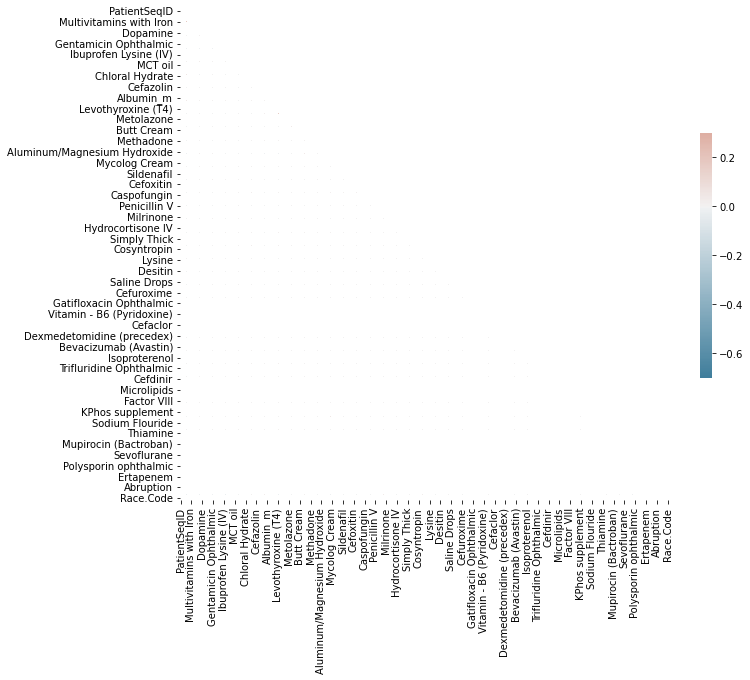

In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [17]:
corr

,PatientSeqID,DSB,PMA,SupportType,Weight,Calfactant (Infasurf),Nystatin cream,Gentamicin,Caffeine Citrate,Ampicillin,...,Insulin.Reported,Antenatal.Steroids,Chorioamnionitis,GestAge,Facility_ID,Race.Code,Gender.Code,Delivery.Code,Race.Code,BPD Grade
PatientSeqID,1.000000,0.005385,-0.001320,0.076937,0.016023,-0.025203,-0.007271,-0.071223,0.165819,-0.060014,...,NaN,0.063630,NaN,-0.004642,0.110127,-0.033035,-0.002504,-0.002394,-0.033035,0.007667
DSB,0.005385,1.000000,0.505951,-0.286633,0.338634,-0.143369,0.032375,-0.407152,0.057796,-0.502370,...,NaN,0.004821,NaN,0.020471,0.006487,-0.001513,-0.001865,-0.002619,-0.001513,0.035022
PMA,-0.001320,0.505951,1.000000,-0.699185,0.772944,-0.105140,-0.001643,-0.337982,-0.080979,-0.343833,...,NaN,0.009100,NaN,0.872652,0.026496,0.066433,0.016113,-0.030351,0.066433,-0.262645
SupportType,0.076937,-0.286633,-0.699185,1.000000,-0.594409,0.100699,0.000683,0.304290,0.087398,0.275639,...,NaN,-0.014281,NaN,-0.648063,-0.055052,-0.002815,0.021007,-0.054761,-0.002815,0.377265
Weight,0.016023,0.338634,0.772944,-0.594409,1.000000,-0.050733,0.000042,-0.196406,-0.166708,-0.176410,...,NaN,-0.016242,NaN,0.704551,0.010789,0.078576,0.111907,0.078350,0.078576,-0.283566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Race.Code,-0.033035,-0.001513,0.066433,-0.002815,0.078576,0.003041,0.020241,-0.015450,0.030991,-0.009108,...,NaN,0.048765,NaN,0.077871,-0.043496,1.000000,0.008600,-0.050369,1.000000,0.042626
Gender.Code,-0.002504,-0.001865,0.016113,0.021007,0.111907,0.002070,-0.004882,0.016312,-0.003324,0.011545,...,NaN,-0.003725,NaN,0.019737,-0.003857,0.008600,1.000000,0.027136,0.008600,0.042238
Delivery.Code,-0.002394,-0.002619,-0.030351,-0.054761,0.078350,-0.008907,0.022327,0.030638,-0.022028,0.038649,...,NaN,-0.027973,NaN,-0.033700,0.007546,-0.050369,0.027136,1.000000,-0.050369,-0.048516
Race.Code,-0.033035,-0.001513,0.066433,-0.002815,0.078576,0.003041,0.020241,-0.015450,0.030991,-0.009108,...,NaN,0.048765,NaN,0.077871,-0.043496,1.000000,0.008600,-0.050369,1.000000,0.042626
